# WELCOME TO SPORTSERVE ASSESMENT
## NAME: ELIJAH NDETO
## ROLE: DATA ENGINEER

## TASK
Given the provided .csv file (users01.csv), please complete the following tasks:
1.	Read the CSV file and load the data in the database of your choice.
2.	Create a query/algorithm that will find the most common user properties and return them as a result.
3.	Create a query/algorithm that will find any similarities between users, that would suggest a "strong" or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.
4.	Create basic visualization representation of results (e.g. with Python Matplotlib)


### IMPORTING LIBRARIES

In [3]:
# csv interactions and data handling
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Database connections
import psycopg2
from sqlalchemy import create_engine
import pyodbc

# Visualization (helpful during development)
import matplotlib.pyplot as plt
import seaborn as sns

## DATABASE CONNECTION
DB: SQLServer

In [5]:
# SQL connection and engine setup
conn_str = (
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"Server=localhost\SQLEXPRESS;"
    r"Database=Sportserve;"
    r"Trusted_Connection=yes;"
)

DB_DRIVER = 'mssql+pyodbc'
DB_SERVER = 'localhost\SQLEXPRESS'
DB_DATABASE = 'Sportserve'
DB_DRIVER_ODBC = 'ODBC Driver 17 for SQL Server'
connection_string = (
    f"{DB_DRIVER}:///?odbc_connect=DRIVER={DB_DRIVER_ODBC};"
    f"SERVER={DB_SERVER};"
    f"DATABASE={DB_DATABASE};"
    f"Trusted_Connection=yes;"
)
#engine.dispose()
engine = create_engine(connection_string)

## READING THE CSVS

In [3]:
users_01 = pd.read_csv("users01.csv")
users_02 = pd.read_csv("users02.csv")

In [4]:
print("users01 shape:", users_01.shape)
print("users01 shape:", users_02.shape)

users01 shape: (1000, 27)
users01 shape: (1000, 27)


In [7]:
print("users01", users_01.columns)

users01 Index(['id', 'uid', 'password', 'first_name', 'last_name', 'username', 'email',
       'avatar', 'gender', 'phone_number', 'social_insurance_number',
       'date_of_birth', 'title', 'key_skill', 'city', 'street_name',
       'street_address', 'zip_code', 'state', 'country', 'lat', 'lng',
       'cc_number', 'plan', 'status', 'payment_method', 'term'],
      dtype='object')


## INSERTING THE CSVS TO TABLES

In [ ]:
#user 1 to db
users_01.to_sql('sports_user1', con=engine, if_exists='replace', index=False)
print("csv exported to SQL database in table 'sports_user1'.")
print (users_01.head())

#user 2 to db
users_02.to_sql('sports_user2', con=engine, if_exists='replace', index=False)
print("csv exported to SQL database in table 'sports_user1'.")
print (users_02.head())

csv exported to SQL database in table 'sports_user1'.
     id                                   uid    password first_name  \
0  1093  c3891995-cc9a-421f-af9c-13b2b8ead17a  oRfm4ZJxp2       Rich   
1  4369  41a8ea22-81e0-425f-90a6-bfc6bde62623  8fsDja6rnm     Hester   
2  5401  8ef4a099-07da-4222-8a0c-8331a1762443  7lC8fOs1re      Craig   
3  5642  cfa4592d-8bdb-4185-b436-9cd88db27014  7KjguWxBp6      Tyron   
4  4478  161e2162-1193-4d5e-9e2d-25972fdf178d  pv9awWtz2h      Cyrus   

  last_name      username                   email  \
0     Robel    rich.robel    rich.robel@email.com   
1     Kiehn  hester.kiehn  hester.kiehn@email.com   
2    Walker  craig.walker  craig.walker@email.com   
3      Feil    tyron.feil    tyron.feil@email.com   
4     Hoppe   cyrus.hoppe   cyrus.hoppe@email.com   

                                              avatar       gender  \
0  https://robohash.org/atdolorumvoluptatem.png?s...  Genderqueer   
1  https://robohash.org/exercitationempariaturduc...    

## READING THE TABLES

In [6]:
# Helper to pull SQL data into pandas DataFrame
def df_from_sql(in_conn_str, in_sql_query):
    connection = pyodbc.connect(in_conn_str)
    data = pd.read_sql(in_sql_query, connection)
    connection.close()
    return data

In [7]:
user01_df = df_from_sql(conn_str, "SELECT * FROM sports_user1")
print(user01_df.columns)

Index(['id', 'uid', 'password', 'first_name', 'last_name', 'username', 'email',
       'avatar', 'gender', 'phone_number', 'social_insurance_number',
       'date_of_birth', 'title', 'key_skill', 'city', 'street_name',
       'street_address', 'zip_code', 'state', 'country', 'lat', 'lng',
       'cc_number', 'plan', 'status', 'payment_method', 'term'],
      dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


In [17]:
display(user01_df.head())

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,...,zip_code,state,country,lat,lng,cc_number,plan,status,payment_method,term
0,1093,c3891995-cc9a-421f-af9c-13b2b8ead17a,oRfm4ZJxp2,Rich,Robel,rich.robel,rich.robel@email.com,https://robohash.org/atdolorumvoluptatem.png?s...,Genderqueer,+963 (107) 509-0233 x2694,...,71034,Indiana,United States,51.994234,-130.321932,4993414478976,Diamond,Idle,Cash,Annual
1,4369,41a8ea22-81e0-425f-90a6-bfc6bde62623,8fsDja6rnm,Hester,Kiehn,hester.kiehn,hester.kiehn@email.com,https://robohash.org/exercitationempariaturduc...,Bigender,+359 1-949-603-6153 x43499,...,10378-3463,Colorado,United States,-49.716503,55.691803,4979613446211,Starter,Pending,Cheque,Monthly
2,5401,8ef4a099-07da-4222-8a0c-8331a1762443,7lC8fOs1re,Craig,Walker,craig.walker,craig.walker@email.com,https://robohash.org/excepturiomnisvoluptates....,Polygender,+690 (817) 048-2200 x59965,...,16853-7888,Oklahoma,United States,-70.852993,156.213051,4489839611119,Professional,Blocked,WeChat Pay,Monthly
3,5642,cfa4592d-8bdb-4185-b436-9cd88db27014,7KjguWxBp6,Tyron,Feil,tyron.feil,tyron.feil@email.com,https://robohash.org/siteteveniet.png?size=300...,Genderqueer,+7 885-725-6405 x89650,...,76052,Nevada,United States,26.106234,56.329692,4946-7177-1476-2745,Silver,Active,Google Pay,Monthly
4,4478,161e2162-1193-4d5e-9e2d-25972fdf178d,pv9awWtz2h,Cyrus,Hoppe,cyrus.hoppe,cyrus.hoppe@email.com,https://robohash.org/namdolorescorrupti.png?si...,Genderqueer,+506 406-471-5657 x4901,...,06532,Colorado,United States,-53.299388,-24.404396,6771-8925-5058-4720,Professional,Blocked,Cash,Monthly


## MOST COMMON USER PROPERTIES

In [8]:
# users from common states
geo_df = df_from_sql(conn_str, "SELECT COUNTRY, STATE, count(*) count FROM [dbo].[sports_user1] GROUP BY COUNTRY, STATE ORDER BY COUNT(*) DESC")
display(geo_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,COUNTRY,STATE,count
0,United States,California,28
1,United States,Arizona,25
2,United States,Connecticut,25
3,United States,New Jersey,25
4,United States,Texas,25


In [9]:
# gender analysis
Gender_df = df_from_sql(conn_str, "select  GENDER, count(*) count from [dbo].[sports_user1] group by Gender order by count(*) desc")
display(Gender_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,GENDER,count
0,Agender,135
1,Polygender,133
2,Bigender,132
3,Female,131
4,Male,128


In [10]:
# user status 
status_df = df_from_sql(conn_str, "select  STATUS, count(*) count from [dbo].[sports_user1] group by STATUS order by count(*) desc")
display(status_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,STATUS,count
0,Pending,258
1,Blocked,253
2,Idle,253
3,Active,236


In [11]:
# prefered payment method
payment_method_df = df_from_sql(conn_str, "select  PAYMENT_METHOD, count(*) count from [dbo].[sports_user1] group by PAYMENT_METHOD order by count(*) desc")
display(payment_method_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,PAYMENT_METHOD,count
0,Google Pay,101
1,Credit card,100
2,Bitcoins,95
3,WeChat Pay,93
4,Visa checkout,88


In [12]:
# premium term
term_df = df_from_sql(conn_str, "select  TERM, count(*) count from [dbo].[sports_user1] group by TERM order by count(*) desc")
display(term_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,TERM,count
0,Full subscription,277
1,Monthly,249
2,Payment in advance,244
3,Annual,230


In [13]:
# user premium plan
plan_df = df_from_sql(conn_str, "select  [plan], count(*) count from [dbo].[sports_user1] group by [plan] order by count(*) desc")
display(plan_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,plan,count
0,Student,84
1,Professional,80
2,Gold,78
3,Premium,77
4,Bronze,77


In [14]:
#user age dynamics
age_df = df_from_sql(conn_str, 
"""with age_data as(
SELECT social_insurance_number, DATEDIFF(YEAR, date_of_birth, GETDATE()) as age
FROM [dbo].[sports_user1]),
age_generation as(
select social_insurance_number, age, case when age <30 then 'Gen-z' when age >=30 and age <=45 then 'Millenials'
else 'Boomers' end as age_Category
from age_data) 
select age_Category, count(*) count from age_generation
group by age_Category
order by count desc""")
display(age_df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\906004370.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(in_sql_query, connection)


,age_Category,count
0,Boomers,463
1,Millenials,353
2,Gen-z,184


## SIMILARITIES BETWEEN USERS

In [48]:
import pandas as pd
import math

# Euclidean distance calculation for lat/lng points
def euclidean_distance(lat1, lon1, lat2, lon2):
    # Check if latitudes and longitudes are valid
    if pd.isna(lat1) or pd.isna(lon1) or pd.isna(lat2) or pd.isna(lon2):
        return None  # Return None if any lat/lng are NaN
    
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    # Simplified Euclidean distance (ignoring curvature of Earth for simplicity)
    distance = math.sqrt(lat_diff**2 + lon_diff**2)
    return distance

# Function to compare users based on various attributes with error handling
def calculate_similarity(user1, user2):
    similarity_score = 0
    
    # Check for invalid lat/lng values (NaN or out of range)
    if pd.isna(user1['lat']) or pd.isna(user1['lng']) or pd.isna(user2['lat']) or pd.isna(user2['lng']):
        return similarity_score  # Return 0 similarity score if lat/lng are missing
    
    # Geographic proximity (using Euclidean distance to calculate distance)
    distance = euclidean_distance(user1['lat'], user1['lng'], user2['lat'], user2['lng'])
    
    if distance is None:
        return similarity_score  # Return 0 similarity score if invalid lat/lng values
    
    # Assuming a "strong" connection if within a threshold distance, else weak
    if distance <= 0.1:  # Adjust the threshold (0.1 degrees) based on your requirements
        similarity_score += 1  # Strong connection if distance is below threshold
    
    # Plan similarity
    if user1['plan'] == user2['plan']:
        similarity_score += 1  # Strong connection if plans match
    
    # Status similarity
    if user1['status'] == user2['status']:
        similarity_score += 1  # Strong connection if statuses match
    
    # Payment method similarity
    if user1['payment_method'] == user2['payment_method']:
        similarity_score += 1  # Strong connection if payment methods match

    # City similarity
    if user1['city'] == user2['city']:
        similarity_score += 1  # Strong connection if City match      

    # street similarity
    if user1['street_name'] == user2['street_name']:
        similarity_score += 1  # Strong connection if street match    

    # term similarity
    if user1['term'] == user2['term']:
        similarity_score += 1  # Strong connection if term match  
    
    # key_skill similarity
    if user1['key_skill'] == user2['key_skill']:
        similarity_score += 1  # Strong connection if key_skill match  

    # title similarity
    if user1['title'] == user2['title']:
        similarity_score += 1  # Strong connection if title match

    # zip_code similarity
    if user1['zip_code'] == user2['zip_code']:
        similarity_score += 1  # Strong connection if zip_code match

    return similarity_score
# Remove rows with invalid latitudes/longitudes
dataset_cleaned = user01_df.dropna(subset=['lat', 'lng'])

# Create a matrix of user similarities with added error handling for invalid values
similarities = []
for i, user1 in dataset_cleaned.iterrows():
    for j, user2 in dataset_cleaned.iterrows():
        if i < j:  # Avoid comparing a user to themselves
            similarity_score = calculate_similarity(user1, user2)
            if similarity_score > 2:  # Only add pairs with a score greater than 2
                similarities.append((user1['uid'], user2['uid'], user1['first_name'], user2['first_name'], similarity_score))

# Display the result (filtered to only those with similarity score > 2)
display(similarities)

[('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  '2664ccf5-57f2-461a-b585-fa8987164025',
  'Rich',
  'Nia',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  'be65e00d-1fee-43eb-ac3f-5a1de3366e23',
  'Rich',
  'Leida',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  'f5fb7b3a-57df-4acc-8da1-5ea6af23bb87',
  'Rich',
  'Alysha',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  '37dc0d14-4a6c-4157-bce3-6b67bb76cfad',
  'Rich',
  'Marlyn',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  'b9e7c5d5-ac28-499c-9bd4-033257521709',
  'Rich',
  'Monte',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  'cbe364c1-baa8-4433-bf02-63734f6dfa9d',
  'Rich',
  'Joesph',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  '970f59e7-8679-49c0-9fe7-53bc4f0b9bd6',
  'Rich',
  'Fermin',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  'eb1ae5af-4efb-4feb-bc63-6b020e84da6d',
  'Rich',
  'Merlin',
  3),
 ('c3891995-cc9a-421f-af9c-13b2b8ead17a',
  '48cf9a5e-d10e-4903-92ec-0d48e2962f5e',
  'Rich',
  'Shawna',
  3

In [49]:
# Create a DataFrame from the list
similarities_df = pd.DataFrame(similarities, columns=['user1', 'user2','first_name1','first_name2','similarity_score'])

# Define a function to categorize similarity scores
def categorize_similarity(score):
    if 2 < score < 5:
        return 'Weak'
    elif 7 <= score <= 10:
        return 'Strong'
    elif 5 <= score < 7:
        return 'Moderate'  # You can also choose another name like "Middle"
    else:
        return 'Other'  # For any scores that fall outside these ranges

# Apply the function to create a new column for the categories
similarities_df['similarity_category'] = similarities_df['similarity_score'].apply(categorize_similarity)
display(similarities_df)


,user1,user2,first_name1,first_name2,similarity_score,similarity_category
0,c3891995-cc9a-421f-af9c-13b2b8ead17a,2664ccf5-57f2-461a-b585-fa8987164025,Rich,Nia,3,Weak
1,c3891995-cc9a-421f-af9c-13b2b8ead17a,be65e00d-1fee-43eb-ac3f-5a1de3366e23,Rich,Leida,3,Weak
2,c3891995-cc9a-421f-af9c-13b2b8ead17a,f5fb7b3a-57df-4acc-8da1-5ea6af23bb87,Rich,Alysha,3,Weak
3,c3891995-cc9a-421f-af9c-13b2b8ead17a,37dc0d14-4a6c-4157-bce3-6b67bb76cfad,Rich,Marlyn,3,Weak
4,c3891995-cc9a-421f-af9c-13b2b8ead17a,b9e7c5d5-ac28-499c-9bd4-033257521709,Rich,Monte,3,Weak
...,...,...,...,...,...,...
10359,c5872a12-e6bb-4635-b8b3-8dcb7e8968a3,00f1a7db-d591-446c-b2ee-42447ffee998,Dusty,Darline,3,Weak
10360,93b9db5a-7366-400b-be5f-ed6c2f6a4fa3,00f1a7db-d591-446c-b2ee-42447ffee998,Shona,Darline,3,Weak
10361,c0820210-e281-4113-b89e-f6abe56a0454,b001f6ea-ceb8-46b0-8d81-ffa21ba0a330,Lewis,Flora,3,Weak
10362,c43e150a-0696-4140-9f35-faad8e568f3a,eaa2c7c8-7a4a-4950-9571-ec1001e685f3,Bong,Billi,3,Weak


## PRESENTATION OF RESULTS

### Geo visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\2823667317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE', y='count', data=geo_df, palette='viridis')


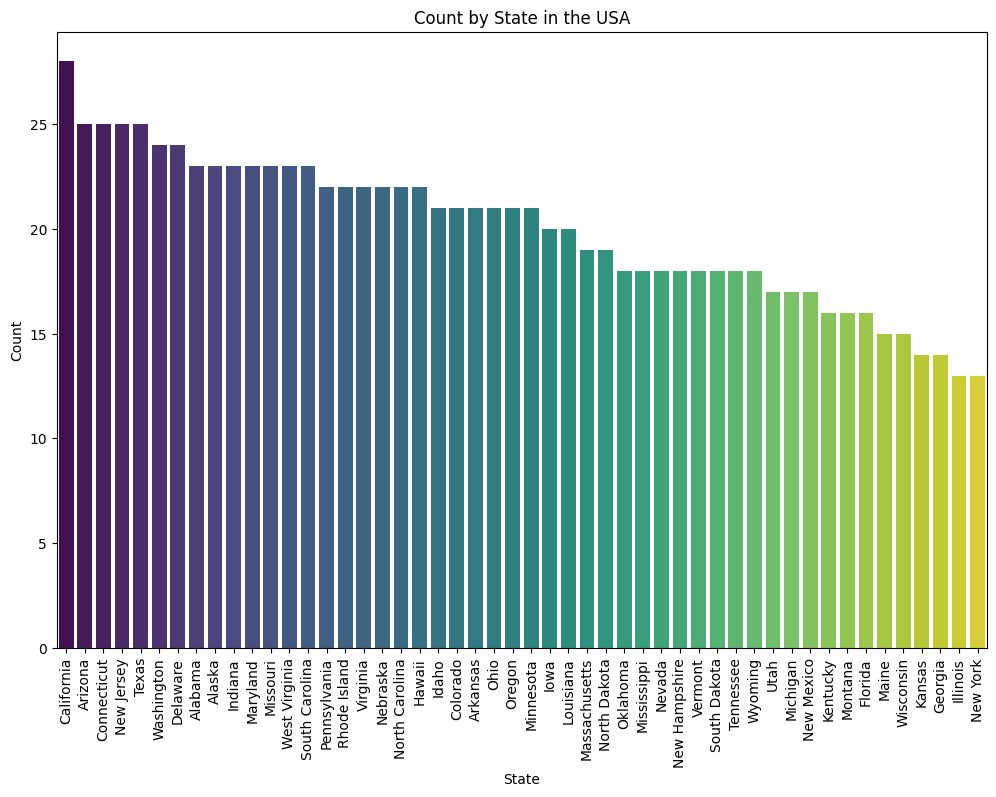

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE', y='count', data=geo_df, palette='viridis')
plt.title('Count by State in the USA')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate state names for readability
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\3710554724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE', y='count', data=top_states, palette='viridis')


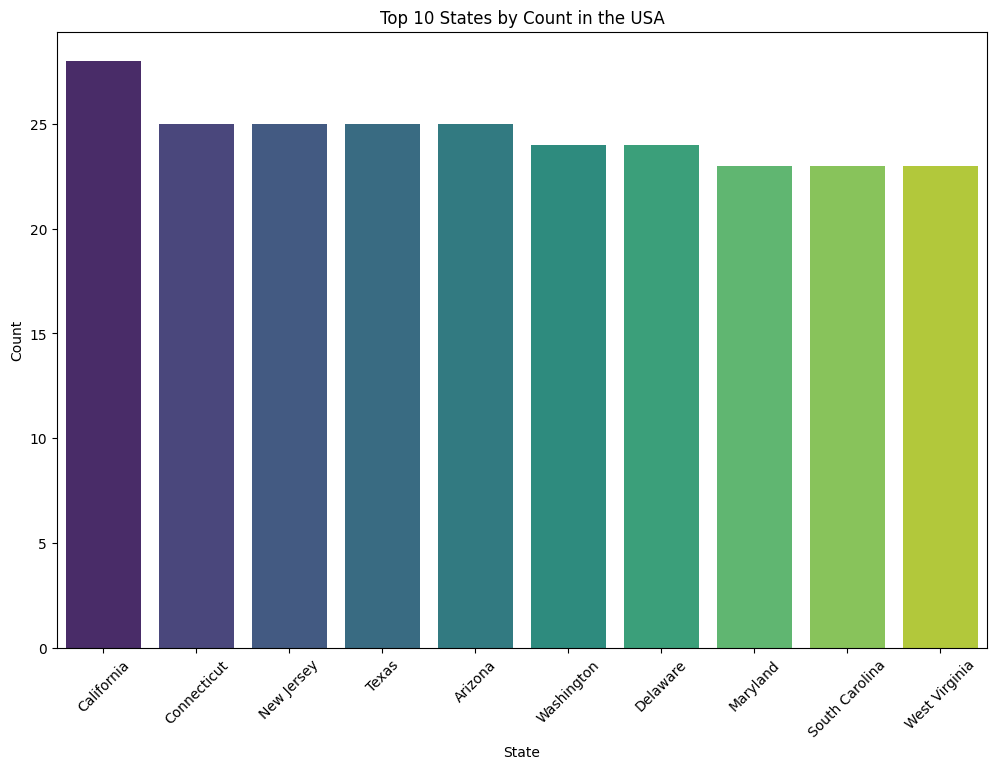

In [18]:
# Sort by 'count' and select top N states
top_states = geo_df.sort_values(by='count', ascending=False).head(10)

# Plot bar plot for top N states
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE', y='count', data=top_states, palette='viridis')
plt.title('Top 10 States by Count in the USA')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Gender visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\1864572843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENDER', y='count', data=Gender_df, palette='viridis')


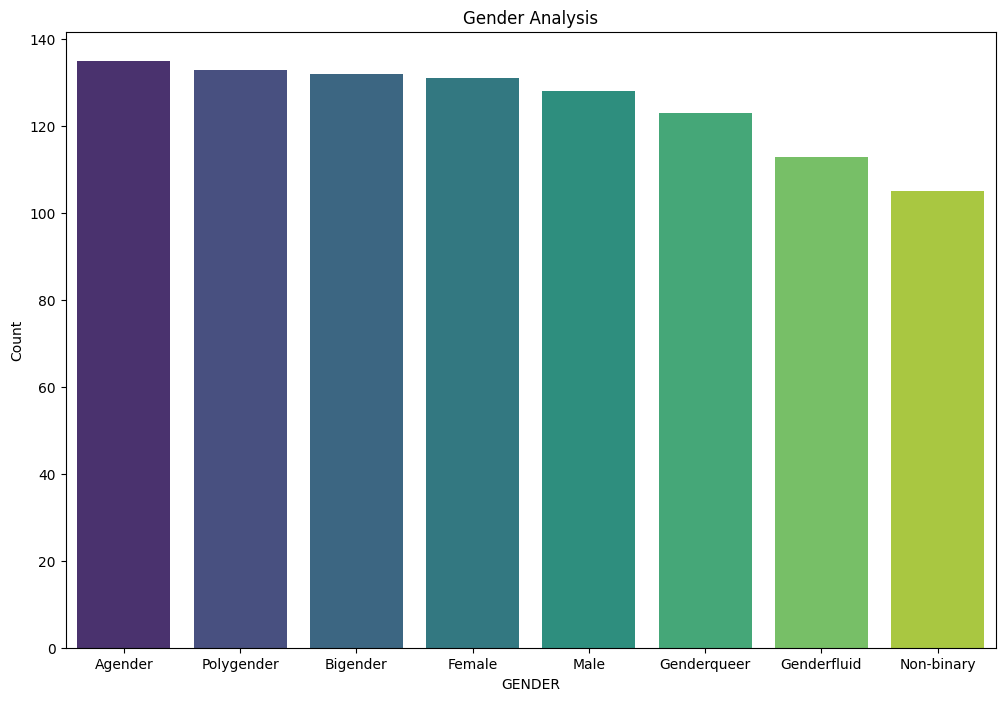

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='GENDER', y='count', data=Gender_df, palette='viridis')
plt.title('Gender Analysis')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()

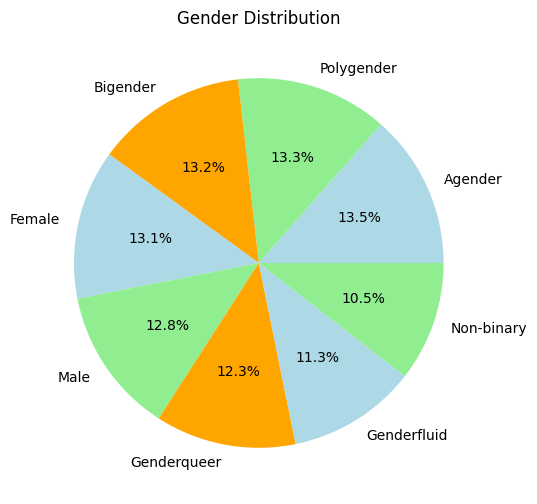

In [25]:
# Plotting a pie chart for payment method distribution
plt.figure(figsize=(6, 6))
plt.pie(Gender_df['count'], labels=Gender_df['GENDER'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen','orange'])
plt.title('Gender Distribution')
plt.show()

### Status Visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\372786483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATUS', y='count', data=status_df, palette='viridis')


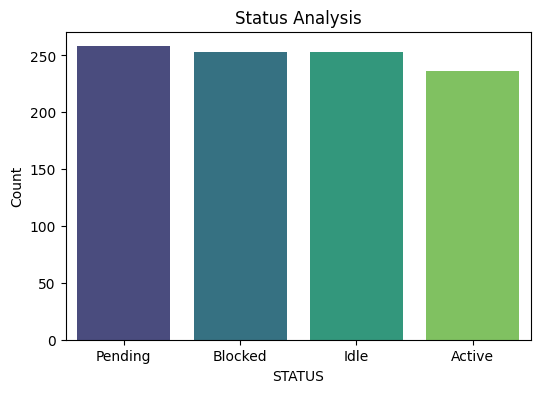

In [24]:
plt.figure(figsize=(6, 4))
sns.barplot(x='STATUS', y='count', data=status_df, palette='viridis')
plt.title('Status Analysis')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.show()

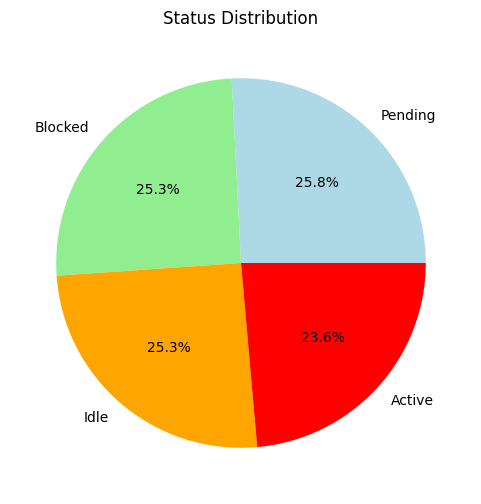

In [28]:
# Plotting a pie chart for status_df distribution
plt.figure(figsize=(6, 6))
plt.pie(status_df['count'], labels=status_df['STATUS'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen','orange','red'])
plt.title('Status Distribution')
plt.show()

### payment method Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\746283124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PAYMENT_METHOD', y='count', data=payment_method_df, palette='viridis')


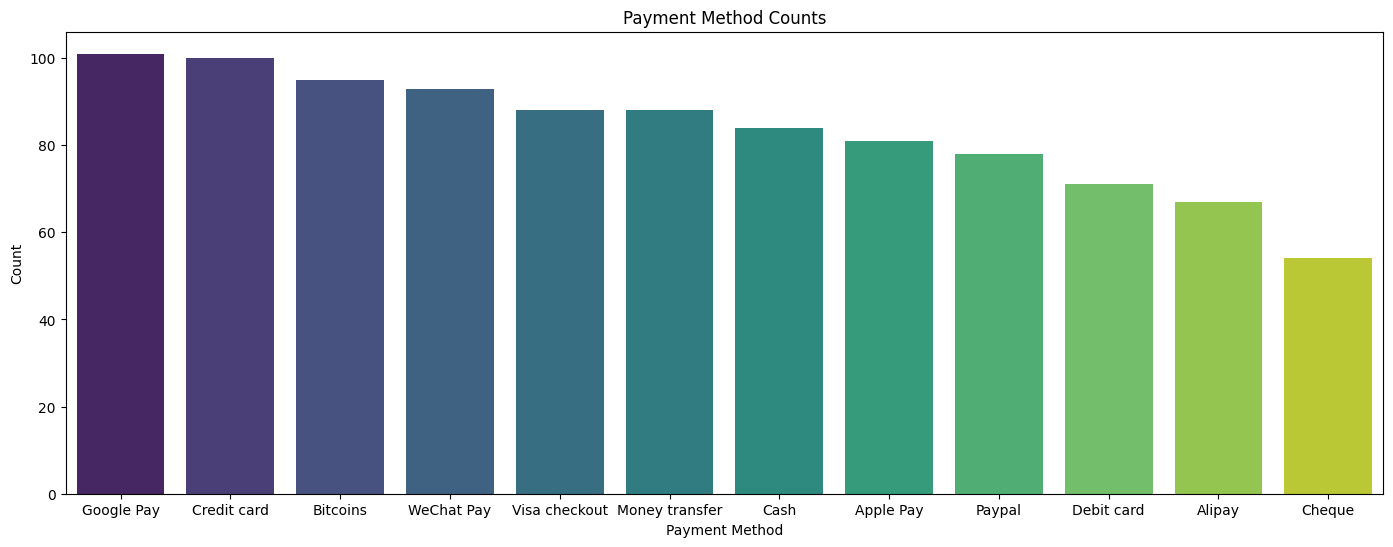

In [37]:
plt.figure(figsize=(17, 6))
sns.barplot(x='PAYMENT_METHOD', y='count', data=payment_method_df, palette='viridis')
plt.title('Payment Method Counts')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

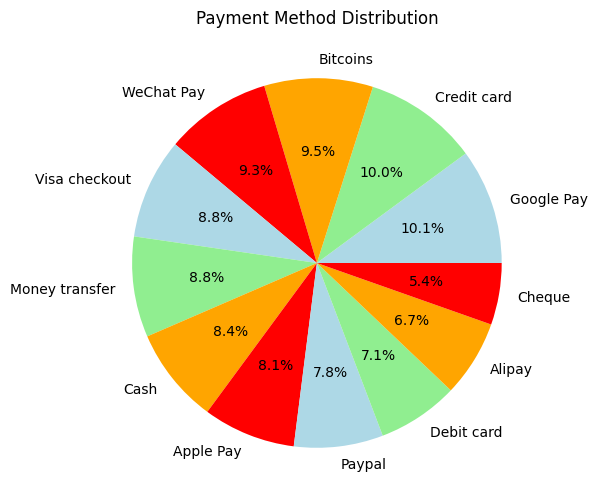

In [34]:
# Plotting a pie chart for Payment method distribution
plt.figure(figsize=(6, 6))
plt.pie(payment_method_df['count'], labels=payment_method_df['PAYMENT_METHOD'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen','orange','red'])
plt.title('Payment Method Distribution')
plt.show()

### Premium Term Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\4009139695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TERM', y='count', data=term_df, palette='viridis')


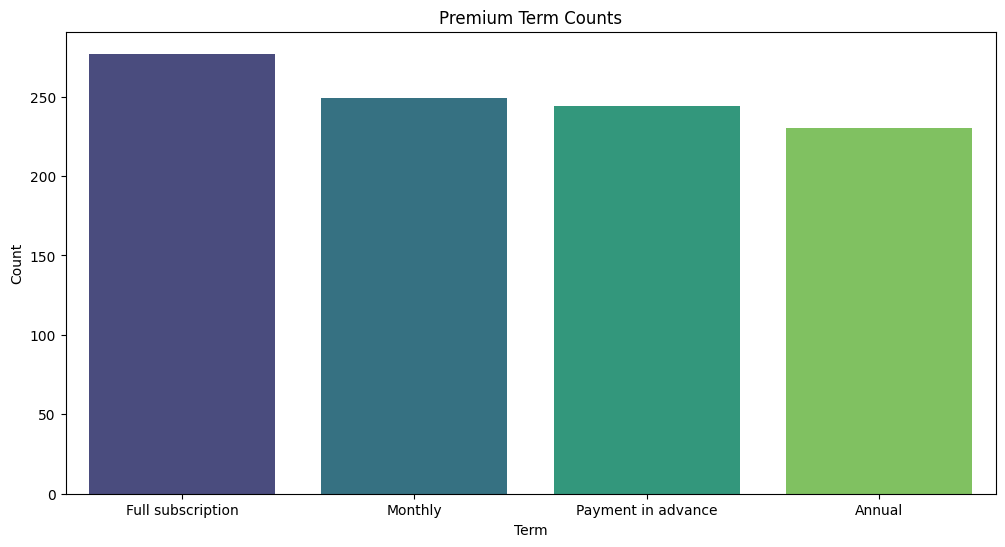

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TERM', y='count', data=term_df, palette='viridis')
plt.title('Premium Term Counts')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

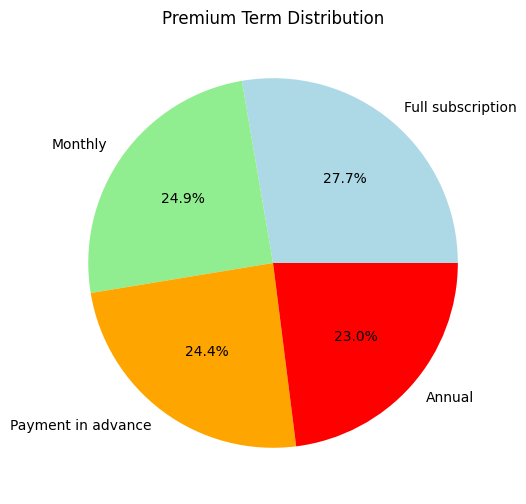

In [40]:
# Plotting a pie chart for term distribution
plt.figure(figsize=(6, 6))
plt.pie(term_df['count'], labels=term_df['TERM'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen','orange','red'])
plt.title('Premium Term Distribution')
plt.show()

### Prefered User premium plan analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\2562993902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plan', y='count', data=plan_df, palette='viridis')


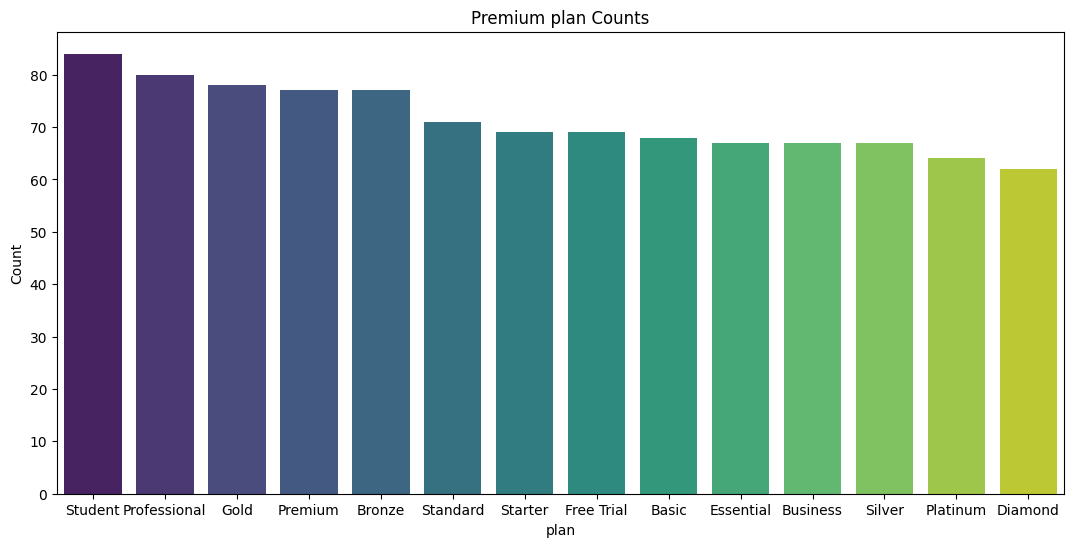

In [42]:
plt.figure(figsize=(13, 6))
sns.barplot(x='plan', y='count', data=plan_df, palette='viridis')
plt.title('Premium plan Counts')
plt.xlabel('plan')
plt.ylabel('Count')
plt.show()

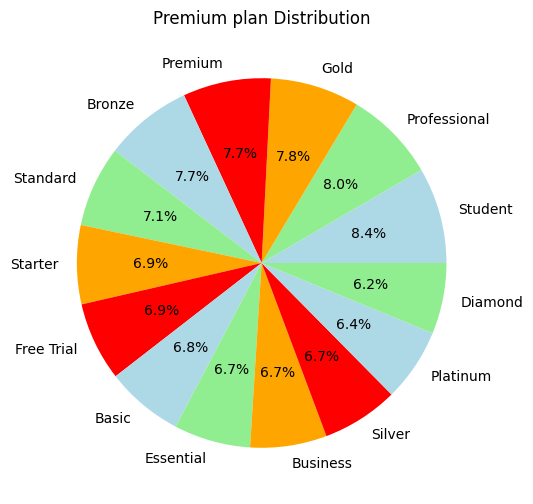

In [43]:
# Plotting a pie chart for plan distribution
plt.figure(figsize=(6, 6))
plt.pie(plan_df['count'], labels=plan_df['plan'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen','orange','red'])
plt.title('Premium plan Distribution')
plt.show()

### user age dynamics

C:\Users\Admin\AppData\Local\Temp\ipykernel_13292\4002931051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_Category', y='count', data=age_df, palette='viridis')


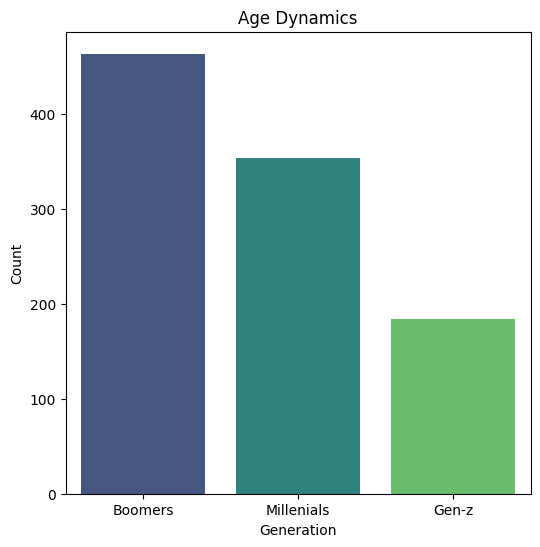

In [45]:
plt.figure(figsize=(6, 6))
sns.barplot(x='age_Category', y='count', data=age_df, palette='viridis')
plt.title('Age Dynamics')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

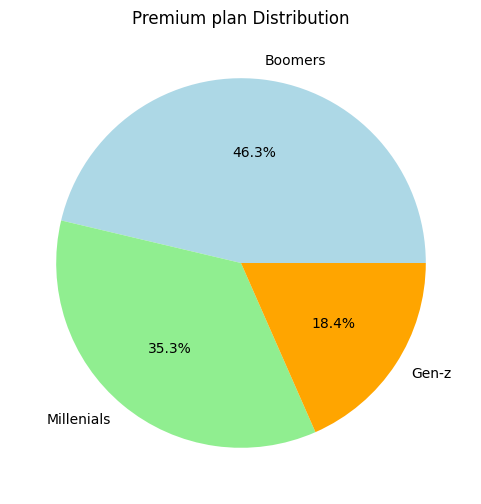

In [46]:
# Plotting a pie chart for age distribution
plt.figure(figsize=(6, 6))
plt.pie(age_df['count'], labels=age_df['age_Category'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen','orange','red'])
plt.title('Premium plan Distribution')
plt.show()